# Context
The dataset is related to red wine variants of the Portuguese "Vinho Verde" wine.\
The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced(there are much more normal wines than excellent or poor ones)

## Input Variables
* 1- Fixed acidity
* 2- Volatile acidity
* 3- Citric acid
* 4- residual sugar
* 5- chlorides
* 6- free sulfur dioxides
* 7- total sulphur dioxide
* 8- density
* 9- pH
* 10- sulphates
* 11- alcohol
* 12- quality


**How many independent variables?**\
There are 11 independent variables 

**How many rows?**
1599 \
**Which is the dependent variable** \
Quality is the dependent variable

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn .model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [13]:
wines=pd.read_csv('/content/winequality-red.csv')
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


The data have 1599 rows and 12 columns

In [14]:
# Information about datatype of every column

wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Most of the data type are numerical tyoe float except quality which is integer

In [15]:
# Checking for missing values

wines.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

there are no missing values


In [16]:
duplicateRows=wines[wines.duplicated()]
duplicateRows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


There 240 row duplicated that we need to remove. By applying drop_duplicates we are making sure that the data is ready to be analyze and we will work with 1359 rows instead of 1599.

In [17]:
red_wines=wines.drop_duplicates()
red_wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [18]:
red_wines['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

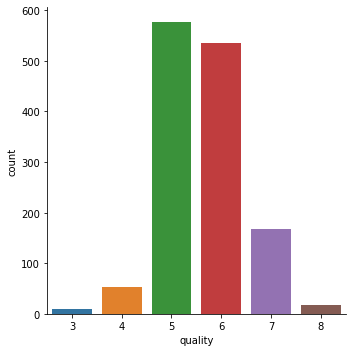

In [19]:
# By doing a bar graph we can see wich quality have the most representation in the dataset

sns.catplot(x='quality', data=red_wines, kind='count')

Quality of wine is concentrated on 5 and 6, so let assume that must be the normal wine. Bad wines are quality 3 and 4, while premiun wines are quality 7 and 8. It's reasonable then to set threshold to be 6.5 to be differentiate between premium and not premium. The value of threshold is an arbritrary based on quality plot.

EDA

 we can observed some outlier in this data


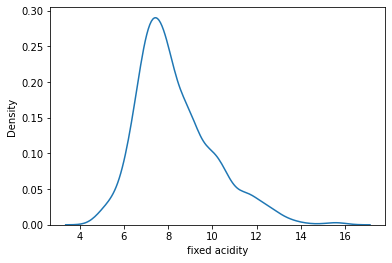

In [20]:
sns.kdeplot(red_wines['fixed acidity'])
print(' we can observed some outlier in this data')

The amount of acetic acid wine, wich at too high of levels can lead to an unpleasant, vinegar taste. 
Acetic acid, systematically named ethanoic acid


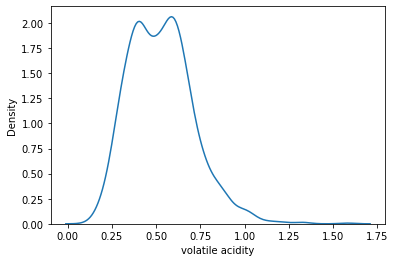

In [21]:
# Density estimation of 'volatile acidity'

sns.kdeplot(red_wines['volatile acidity'])
print("The amount of acetic acid wine, wich at too high of levels can lead to an unpleasant, vinegar taste. \nAcetic acid, systematically named ethanoic acid")

The amount of acetic acid wine, wich at too high of levels can lead to an unpleasant, vinegar taste. 
Acetic acid, systematically named ethanoic acid


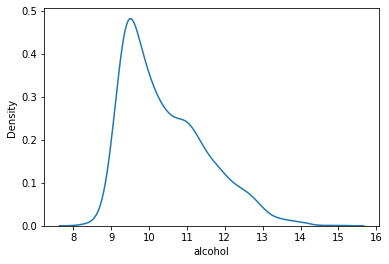

In [22]:
sns.kdeplot(red_wines['alcohol'])
print("The amount of acetic acid wine, wich at too high of levels can lead to an unpleasant, vinegar taste. \nAcetic acid, systematically named ethanoic acid")

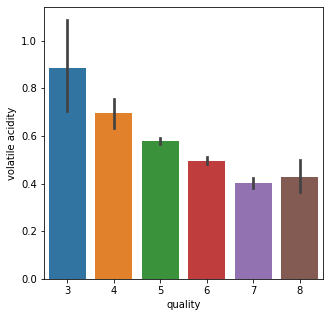

In [23]:
# Relation of volatile acidity and fixed accidity

plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data=red_wines)

the lest volatile acidity the best wine quality, that means quality 5,6 and 7 and 8 have less volatile acidity compares with 3 and 4. However quality 7 seams to has the less volatile acidity.

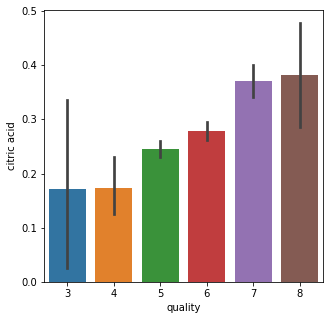

In [24]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = red_wines)

on the other hand citric acidity increased with quality

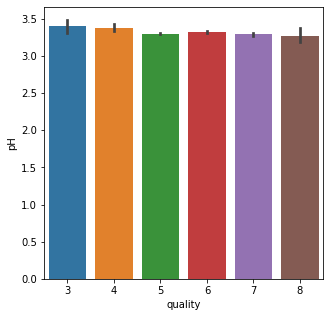

In [25]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'pH', data = red_wines)

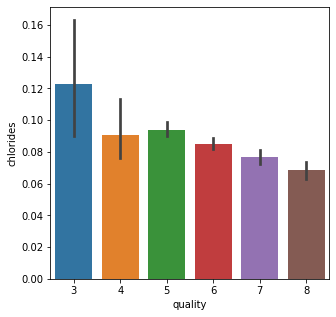

In [26]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'chlorides', data = red_wines)


The best quality have less chlorides

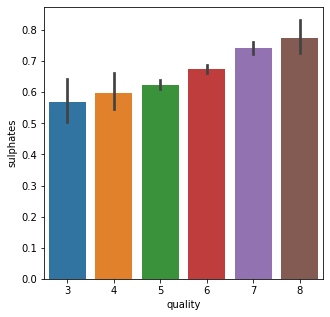

In [27]:
# Relation of volatile acidity and fixed accidity

plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'sulphates', data = red_wines)


In [87]:
#Calculate and order correlations
correlations=red_wines.corr()['quality'].sort_values(ascending=False)
correlations

quality                 1.000000
alcohol                 0.480343
sulphates               0.248835
citric acid             0.228057
fixed acidity           0.119024
residual sugar          0.013640
free sulfur dioxide    -0.050463
pH                     -0.055245
chlorides              -0.130988
total sulfur dioxide   -0.177855
density                -0.184252
volatile acidity       -0.395214
Name: quality, dtype: float64

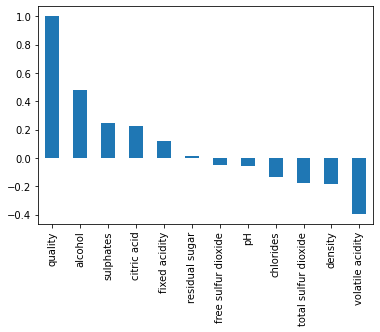

In [88]:
correlations.plot(kind='bar')

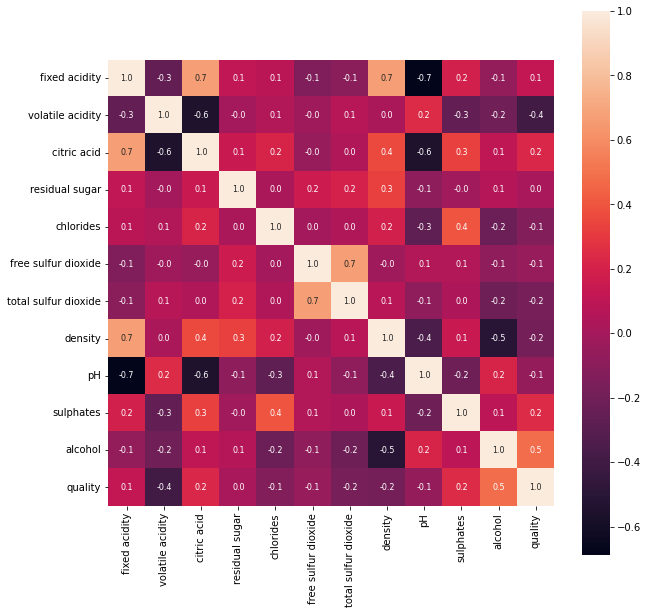

In [28]:
correlation=red_wines.corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f', annot=True, annot_kws={'size': 8}, cmap=None)

WE can observe that half of the data correlates positively with quality while the mother half correlates negatively.
The features that we are selecting for the analysis are the ones which are a minimum threshold of 0.2(absolute value) since we do not have to take into account features whose values might be redundant and not provide information at all.

In [89]:
print(abs(correlations)>0.2)

quality                  True
alcohol                  True
sulphates                True
citric acid              True
fixed acidity           False
residual sugar          False
free sulfur dioxide     False
pH                      False
chlorides               False
total sulfur dioxide    False
density                 False
volatile acidity         True
Name: quality, dtype: bool


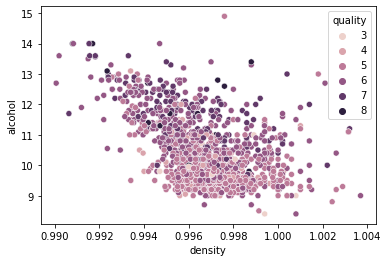

In [29]:
# Plotted the highest correlated pairs
sns.scatterplot(data=red_wines, x='density', y='alcohol', hue='quality')
plt.show()


Data Preprocessing

In [30]:
# Separate the data and label

X= red_wines.drop('quality', axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [31]:
red_wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [32]:
y=red_wines['quality']

# Train and Test Split

In [33]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=100)

In [34]:
print(y.shape,y_train.shape,y_test.shape)

(1359,) (951,) (408,)


# Model Training:
Linear regression 
from sklearn.linear_model import LinearRegression

In [35]:
from sklearn.linear_model import LinearRegression

# fitting the model

lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [36]:
print(lr.intercept_)
pd.DataFrame(lr.coef_,X.columns, columns=['Co-efficient'])

-7.814500198162586


,Co-efficient
fixed acidity,0.000883
volatile acidity,-1.044460
citric acid,-0.022482
residual sugar,-0.008787
chlorides,-1.877471
free sulfur dioxide,0.003507
total sulfur dioxide,-0.002989
density,12.092656
pH,-0.450914
sulphates,0.753163


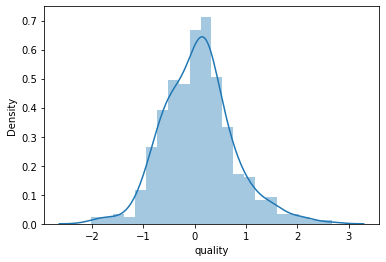

In [37]:
# Predicting the output from testing data

predict_linear=lr.predict(X_test)

# analysing the Predicition

sns.distplot((predict_linear-y_test))

The predicted values have a normally distributed residuals which are good sign for predicition

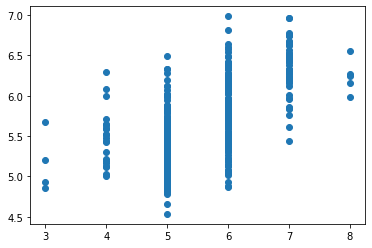

In [38]:
plt.scatter(y_test,predict_linear)

In [39]:
# Importing metrics from sklearn library
from sklearn import metrics
# different types of error in predicting the model by Linear Regression

mae=metrics.mean_absolute_error(y_test,predict_linear)
mse=metrics.mean_squared_error(y_test,predict_linear)
rmse=np.sqrt(metrics.mean_squared_error(y_test,predict_linear))

print('Mean Absolute Error is ', mae)
print('Mean Squared Error is ', mse)
print('Root Mean Squared Error is ', rmse)

Mean Absolute Error is  0.5249898285704159
Mean Squared Error is  0.47385394752603033
Root Mean Squared Error is  0.6883705016384929


In [40]:
# printing Variance score or Actual performance score

vs=metrics.explained_variance_score(y_test, predict_linear)

print('Variance Score is ', vs*100,'%')

Variance Score is  36.06349124914266 %


The predictability of the model is too low by using Linear Regression

# Machine Learning Models


In [41]:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

Ridge Regression
Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model. This modification is done by adding a penalty parameter that is equivalent to the square of the magnitude of the coefficients.

Loss function = OLS + alpha * summation (squared coefficient values)

In the above loss function, alpha is the parameter we need to select. A low alpha value can lead to over-fitting, whereas a high alpha value can lead to under-fitting.

In scikit-learn, a ridge regression model is constructed by using the Ridge class. The first line of code below instantiates the Ridge Regression model with an alpha value of 0.01. The second line fits the model to the training data.

The third line of code predicts, while the fourth and fifth lines print the evaluation metrics - RMSE and R-squared - on the training set. The same steps are repeated on the test dataset in the sixth to eight lines of code.

In [42]:
rr = Ridge(alpha=0.1)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

0.6446820358866457
0.36324764539612864
0.6879050158164856
0.3549912749302445


The above ouput shows that the RMSE and R-squared values for the Ridge Regression model on the training data is 64% amd 36% repectively. For the test data, the results for these metrics si 68% and 35% that are sligher higher compares with the training.

Lasso Regression
Lasso regression, or the Least Absolute Shrinkage and Selection Operator, is also a modification of linear regression. In Lasso, the loss function is modified to minimize the complexity of the model by limiting the sum of the absolute values of the model coefficients (also called the l1-norm).

The loss function for Lasso Regression can be expressed as below:

Loss function = OLS + alpha * summation (absolute values of the magnitude of the coefficients)

In the above loss function, alpha is the penalty parameter we need to select. Using an l1 norm constraint forces some weight values to zero to allow other coefficients to take non-zero values.

In scikit-learn, a lasso regression model is constructed by using the Lasso class. The first line of code below instantiates the Lasso Regression model with an alpha value of 0.01. The second line fits the model to the training data.

The third line of code predicts, while the fourth and fifth lines print the evaluation metrics - RMSE and R-squared - on the training set. The same steps are repeated on the test dataset in the sixth to eight lines of code.

In [43]:
model_lasso= Lasso(alpha=0.01)
model_lasso.fit(X_train,y_train)

pred_train_lasso=model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

0.6542217829774518
0.3442634027125734
0.7048125228843009
0.32289524919065526


ElasticNet Regression
ElasticNet combines the properties of both Ridge and Lasso regression. It works by penalizing the model using both the l2-norm and the l1-norm.

In scikit-learn, an ElasticNet regression model is constructed by using the ElasticNet class. The first line of code below instantiates the ElasticNet Regression with an alpha value of 0.01. The second line fits the model to the training data.

The third line of code predicts, while the fourth and fifth lines print the evaluation metrics - RMSE and R-squared - on the training set. The same steps are repeated on the test dataset in the sixth to eight lines of code.

In [44]:
#Elastic Net
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print(r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))

0.6530361144548535
0.34663807665425717
0.7027126344084408
0.32692391305684876


# Implementing Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.preprocessing import StandardScaler

In [46]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [47]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

lr.score(X_test,y_test)

0.5882352941176471

In [48]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.5882352941176471

In [49]:
quality_above5=red_wines[red_wines['quality'] >=5]
quality_above5.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [50]:
correlation=quality_above5.corr()
correlation.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.249669,0.668959,0.125975,0.084006,-0.158761,-0.116271,0.668668,-0.688211,0.186544,-0.050487,0.111153
volatile acidity,-0.249669,1.000000,-0.547439,0.004181,0.057444,0.007277,0.111354,0.035380,0.220639,-0.245232,-0.214027,-0.339726
citric acid,0.668959,-0.547439,1.000000,0.152169,0.195087,-0.073598,0.026039,0.354479,-0.539705,0.306914,0.116350,0.206819
residual sugar,0.125975,0.004181,0.152169,1.000000,0.033285,0.178537,0.203302,0.340964,-0.090153,-0.009786,0.049764,0.030804
chlorides,0.084006,0.057444,0.195087,0.033285,1.000000,-0.013973,0.046645,0.192446,-0.262153,0.365657,-0.226408,-0.133149
free sulfur dioxide,-0.158761,0.007277,-0.073598,0.178537,-0.013973,1.000000,0.666649,-0.024695,0.073776,0.026730,-0.079934,-0.105157
total sulfur dioxide,-0.116271,0.111354,0.026039,0.203302,0.046645,0.666649,1.000000,0.073961,-0.066949,0.012776,-0.225515,-0.255714
density,0.668668,0.035380,0.354479,0.340964,0.192446,-0.024695,0.073961,1.000000,-0.352202,0.136606,-0.507825,-0.211859
pH,-0.688211,0.220639,-0.539705,-0.090153,-0.262153,0.073776,-0.066949,-0.352202,1.000000,-0.188617,0.204821,-0.004715
sulphates,0.186544,-0.245232,0.306914,-0.009786,0.365657,0.026730,0.012776,0.136606,-0.188617,1.000000,0.101598,0.247494


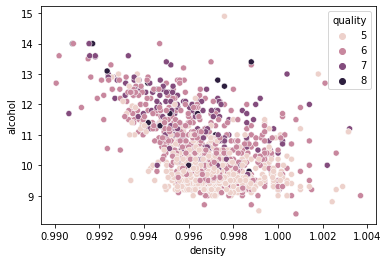

In [51]:
# Plotting the highest correlated pairs
sns.scatterplot(data=quality_above5, x='density', y='alcohol', hue='quality')
plt.show()

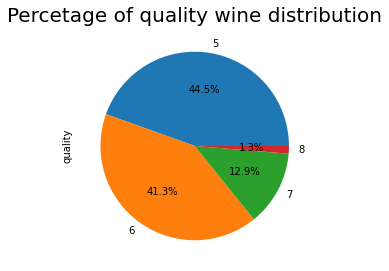

In [52]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0, bottom=0.5, right=0.9, top=0.9, wspace=0.5, hspace=0.8)
plt.subplot(141)
plt.title('Percetage of quality wine distribution',fontsize = 20)
quality_above5['quality'].value_counts().plot.pie(autopct="%1.1f%%")

In [53]:
quality_above5

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [54]:
quality_above5.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [78]:
quality_above5.columns = quality_above5.columns.str.replace(' ', '_')
quality_above5

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [79]:
X1= quality_above5.drop('quality', axis=1)
X1.shape

(1296, 11)

In [80]:
y1=quality_above5['quality']
y1.shape

(1296,)

In [81]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X, y,test_size=0.3,random_state=100)

In [82]:
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(951, 11)
(408, 11)
(951,)
(408,)


# Running Machine Learning algorithms with this new dataset

In [151]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [152]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_predlog=lr.predict(X_test)

lr.score(X_test,y_test)

0.5989717223650386

In [85]:
metrics.accuracy_score(y1_test,y1_pred)

0.5882352941176471

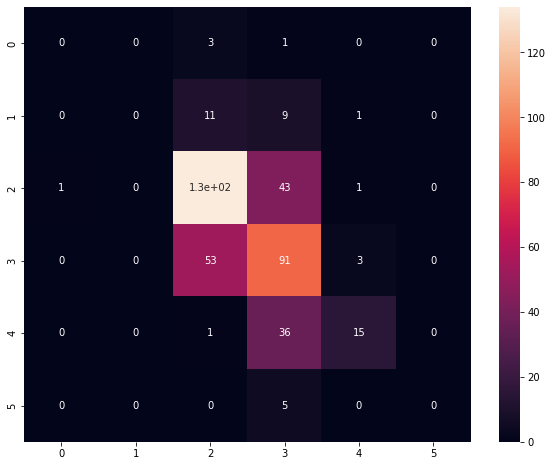

In [62]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y1_test, y1_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(mat, annot=True)

In [63]:
lr=LinearRegression()
lr.fit(X1_train,y1_train)

LinearRegression()

In [64]:
pd.DataFrame(lr.coef_,X.columns, columns=['Co-efficient'])

,Co-efficient
fixed acidity,0.001534
volatile acidity,-0.193336
citric acid,-0.004464
residual sugar,-0.011441
chlorides,-0.102957
free sulfur dioxide,0.036646
total sulfur dioxide,-0.100834
density,0.022549
pH,-0.070163
sulphates,0.138333


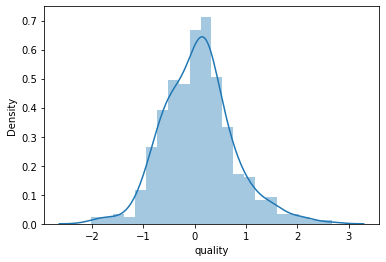

In [65]:
# Predicting the output from testing data

predict_linear=lr.predict(X1_test)

# analysing the Predicition

sns.distplot((predict_linear-y1_test))

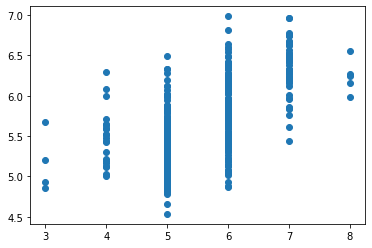

In [66]:
plt.scatter(y1_test,predict_linear)

In [67]:
# Importing metrics from sklearn library
from sklearn import metrics
# different types of error in predicting the model by Linear Regression

mae=metrics.mean_absolute_error(y1_test,predict_linear)
mse=metrics.mean_squared_error(y1_test,predict_linear)
rmse=np.sqrt(metrics.mean_squared_error(y1_test,predict_linear))

print('Mean Absolute Error is ', mae)
print('Mean Squared Error is ', mse)
print('Root Mean Squared Error is ', rmse)

Mean Absolute Error is  0.5249898285704154
Mean Squared Error is  0.4738539475260306
Root Mean Squared Error is  0.6883705016384931


In [68]:
# printing Variance score or Actual performance score

vs=metrics.explained_variance_score(y1_test, predict_linear)

print('Variance Score is ', vs*100,'%')

Variance Score is  36.06349124914262 %


In [69]:
rr = Ridge(alpha=0.1)
rr.fit(X1_train, y1_train) 
pred_train_rr= rr.predict(X1_train)
print(np.sqrt(mean_squared_error(y1_train,pred_train_rr)))
print(r2_score(y1_train, pred_train_rr))

pred_test_rr= rr.predict(X1_test)
print(np.sqrt(mean_squared_error(y1_test,pred_test_rr))) 
print(r2_score(y1_test, pred_test_rr))

0.6446023589060454
0.363405029554562
0.6883693933920918
0.3541201410360558


In [70]:
model_lasso= Lasso(alpha=0.01)
model_lasso.fit(X1_train,y1_train)

pred_train_lasso=model_lasso.predict(X1_train)
print(np.sqrt(mean_squared_error(y1_train,pred_train_lasso)))
print(r2_score(y1_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X1_test)
print(np.sqrt(mean_squared_error(y1_test,pred_test_lasso))) 
print(r2_score(y1_test, pred_test_lasso))

0.6455854361787488
0.3614618183437961
0.6896431625023549
0.35172763785065175


In [71]:
#Elastic Net
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X1_train, y1_train) 
pred_train_enet= model_enet.predict(X1_train)
print(np.sqrt(mean_squared_error(y1_train,pred_train_enet)))
print(r2_score(y1_train, pred_train_enet))

pred_test_enet= model_enet.predict(X1_test)
print(np.sqrt(mean_squared_error(y1_test,pred_test_enet)))
print(r2_score(y1_test, pred_test_enet))

0.6449493775549344
0.3627194292414442
0.6886593126755244
0.3535759783809461


In [72]:
sc=StandardScaler()
X1_train=sc.fit_transform(X1_train)
X1_test=sc.transform(X1_test)

In [74]:
lr=LogisticRegression()
lr.fit(X1_train,y1_train)
y_pred=lr.predict(X1_test)

lr.score(X1_test,y1_test)

0.5882352941176471

Applying a threshold of quality 6.5


# Feature Engimeering
The following feature are selected:\n
* **alcohol**
* **sulphates**
* **citric acid**
* **volatile acidity**

**Alcohol Percent**

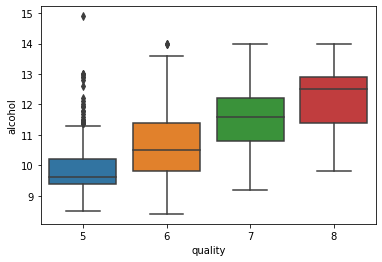

In [90]:
bp=sns.boxplot(x='quality', y='alcohol',data=quality_above5)

There is a corrleation between quality and alcohol the higher the alcohol better the quality. However we can observe some outlier in quality 5 and 6 respectively.

In [91]:
quality_five_six=quality_above5.loc[(quality_above5['quality'] >=5) & (quality_above5['quality'] <=6)]
quality_five_six['quality'].value_counts()

5    577
6    535
Name: quality, dtype: int64

In [93]:
correlations_subset=quality_five_six.corr()['quality'].sort_values(ascending=False)
correlations_subset

quality                 1.000000
alcohol                 0.390012
sulphates               0.151655
citric_acid             0.092005
pH                      0.056222
fixed_acidity           0.049372
residual_sugar         -0.019744
free_sulfur_dioxide    -0.072737
chlorides              -0.089179
density                -0.143781
volatile_acidity       -0.240359
total_sulfur_dioxide   -0.250649
Name: quality, dtype: float64

The correlations for wines 5 and 6 indicates alcohol, volitile acidity and total_sulfur_dioxide have a correlation equal or above the threshols of 0.2

**Sulphates & Citric Acidity Presence**

[Text(0.5, 1.0, 'Sulphates in diffrente quality of wines')]

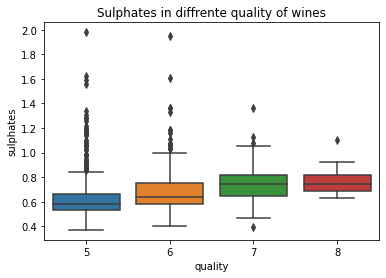

In [94]:
bp=sns.boxplot(x='quality', y='sulphates', data=quality_above5)
bp.set(title='Sulphates in diffrente quality of wines')

[Text(0.5, 1.0, 'Citric Acid in Different Wines Quality')]

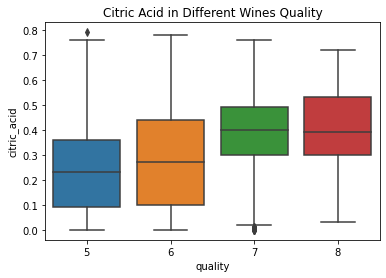

In [95]:
bp=sns.boxplot(x='quality', y='citric_acid', data=quality_above5)
bp.set(title='Citric Acid in Different Wines Quality')

Features sulphates and citirc acid seem to be linearly positive.

**Acetic Acid Presence**

[Text(0.5, 1.0, 'Acetic Acid Presence in Different Wines Quality')]

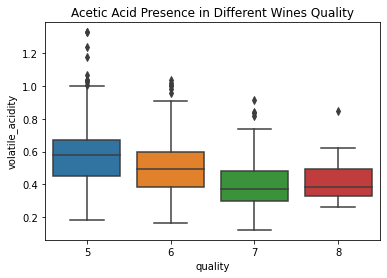

In [96]:
bp=sns.boxplot(x='quality', y='volatile_acidity', data=quality_above5)
bp.set(title='Acetic Acid Presence in Different Wines Quality')

For acetic acid presence, we can clearly see how less acetic acid presence in wine seems positive while having higher values contribute to having a lower rating

In [101]:
red_wines_aux=red_wines.copy()

red_wines_aux['quality'].replace([3,4], ['low','low'], inplace=True)
red_wines_aux['quality'].replace([5,6], ['medium','medium'], inplace=True)
red_wines_aux['quality'].replace([7,8],['high','high'], inplace=True)

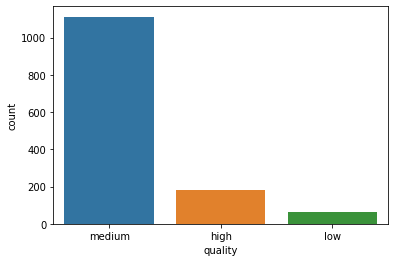

In [102]:
sns.countplot(red_wines_aux['quality'])

Feature Selection


In [105]:
correlations[abs(correlations)> 0.2]

quality             1.000000
alcohol             0.480343
sulphates           0.248835
citric acid         0.228057
volatile acidity   -0.395214
Name: quality, dtype: float64

# ** Regression Models**

In [107]:
# Separate the feauture from the target feature (quality) and we slpit the data for training and test

X= quality_above5.loc[:,['alcohol', 'sulphates', 'citric_acid', 'volatile_acidity']]

y=quality_above5['quality']

X_train, X_test, y_train,y_test= train_test_split(X,y, test_size=0.3, random_state=100)

# **Linear Regression**

In [113]:
regressor=LinearRegression()
regressor.fit(X_train, y_train)

y_prediction_lr=regressor.predict(X_test)
y_prediction_lr=np.round(y_prediction_lr)

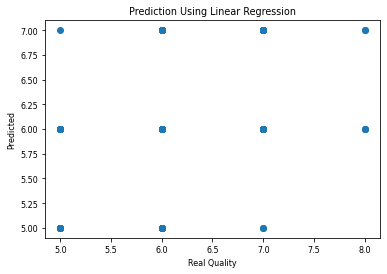

In [114]:
plt.scatter(y_test,y_prediction_lr)
plt.title("Prediction Using Linear Regression")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

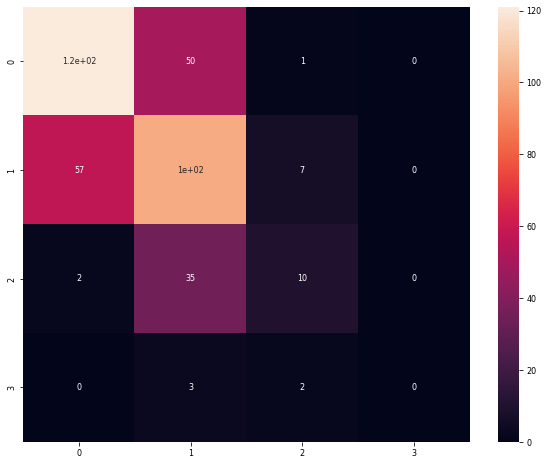

In [116]:
# Confusion Matrix for the Linear Regression Model

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_prediction_lr)
plt.figure(figsize=(10, 8))
sns.heatmap(mat, annot=True)

**RMSE of Models**
Root Mean Square Error which is the standard deviation of the residuals(predicitons errors). Residuals are a measure of how far from the regression line data points are so RMSE is a measure of the spread out these residuals.

In [128]:
MAE=metrics.mean_absolute_error(y_test,y_prediction_lr)
MSE=metrics.mean_squared_error(y_test,y_prediction_lr)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_prediction_lr))

print("MAE for new improved Linear Regression is: " + str(MAE) + "\n")
print("MSE for new improved Linear Regression is: " + str(MSE) + "\n")
print("RMSE for new improved Linear Regression is: " + str(RMSE) + "\n")

MAE for new improved Linear Regression is: 0.4190231362467866

MSE for new improved Linear Regression is: 0.4498714652956298

RMSE for new improved Linear Regression is: 0.6707245822956169



Ridge

In [191]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
y_pred_rr= rr.predict(X_test)
print('The Ridge MSE is', np.sqrt(mean_squared_error(y_test,y_pred_rr)))
print('The Ridge Root Squared is ', r2_score(y_test, y_pred_rr))


The Ridge MSE is 0.5971630075010402
The Ridge Root Squared is  0.3233313011217216


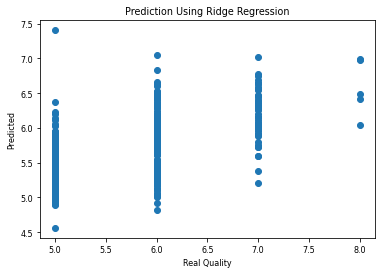

In [192]:
plt.scatter(y_test,y_pred_rr)
plt.title("Prediction Using Ridge Regression")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

Lasso

In [181]:
model_lasso= Lasso(alpha=0.01)
model_lasso.fit(X_train,y_train)

y_pred_lasso=model_lasso.predict(X_test)
print('The Lasso  MSE is', np.sqrt(mean_squared_error(y_test,y_pred_lasso)))
print('The Lasso Root squares is ',r2_score(y_test, y_pred_lasso))



The Lasso  MSE is 0.5960248479802926
The Lasso Root squares is  0.3259082289427663


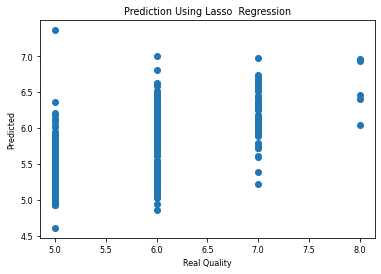

In [188]:
plt.scatter(y_test,y_pred_lasso)
plt.title("Prediction Using Lasso  Regression")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

# Elastic Net

In [182]:
#Elastic Net
model_enet = ElasticNet(alpha = 0.025)
model_enet.fit(X_train, y_train) 
y_pred_enet= model_enet.predict(X_test)


print('This is MSE for Elastic Net',np.sqrt(mean_squared_error(y_test,y_pred_enet)))
print('This is the root square for Elastic Net',r2_score(y_test, y_pred_enet))

This is MSE for Elastic Net 0.5956003822338026
This is the root square for Elastic Net 0.3268680110150779


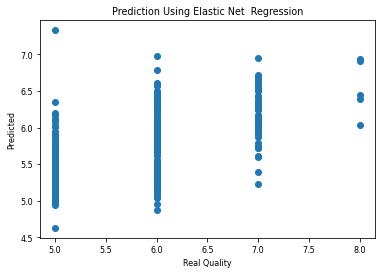

In [194]:
plt.scatter(y_test,y_pred_enet)
plt.title("Prediction Using Elastic Net  Regression")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

Logistic Regression

In [148]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [150]:
logisticr=LogisticRegression()
logisticr.fit(X_train,y_train)
y_predlogisticr=logisticr.predict(X_test)

logisticr.score(X_test,y_test)

0.5989717223650386

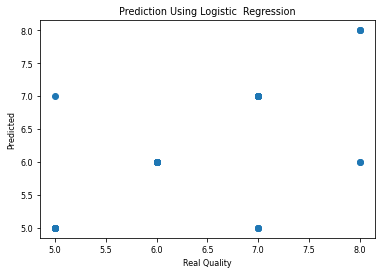

In [173]:
plt.scatter(y_test,y_predlog)
plt.title("Prediction Using Logistic  Regression")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

Decision Tree Regresor

In [139]:
regressor=DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_prediction_dt=regressor.predict(X_test)
y_prediction_dt=np.round(y_prediction_dt)

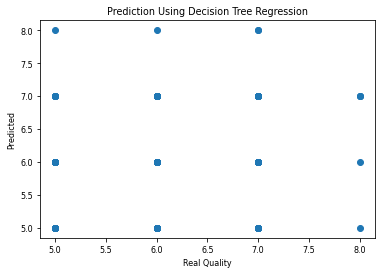

In [140]:
plt.scatter(y_test,y_prediction_dt)
plt.title("Prediction Using Decision Tree Regression")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

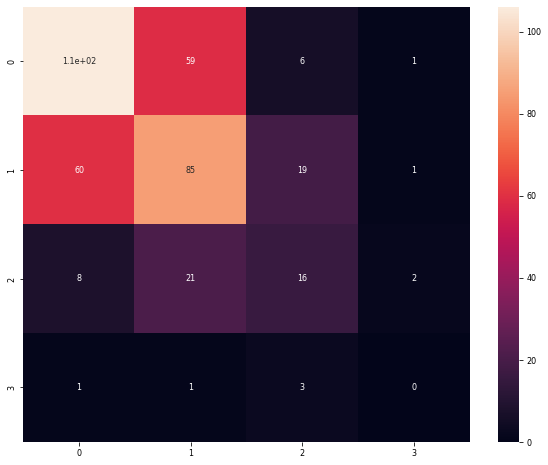

In [141]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_prediction_dt)
plt.figure(figsize=(10, 8))
sns.heatmap(mat, annot=True)

Random Forest Regressor

In [142]:
regressor = RandomForestRegressor(n_estimators=10,random_state = 100)
regressor.fit(X_train, y_train)
y_prediction_rf = regressor.predict(X_test)
y_prediction_rf = np.round(y_prediction_rf)

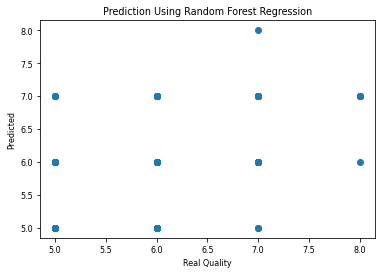

In [143]:
plt.scatter(y_test,y_prediction_rf)
plt.title("Prediction Using Random Forest Regression")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

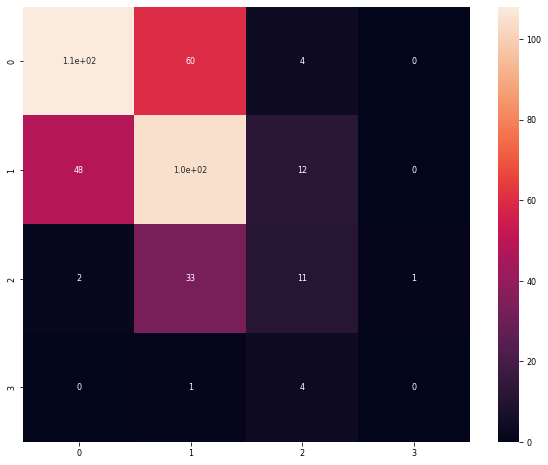

In [144]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_prediction_rf)
plt.figure(figsize=(10, 8))
sns.heatmap(mat, annot=True)

# RMSE Decison Tree Regressor

Linear Regresion RMSE

In [157]:
RMSE=sqrt(mean_squared_error(y_test,y_prediction_lr))
RMSE

0.6707245822956169

Logistic Linear Regression


In [155]:

RMSE=sqrt(mean_squared_error(y_test,y_predlog))
RMSE

0.6745464057204937

Ridge Regression RMSE

In [196]:
RMSE=sqrt(mean_squared_error(y_test,y_pred_rr))
RMSE

0.5971630075010402

Lasso Regression RMSE

In [195]:
RMSE=sqrt(mean_squared_error(y_test,y_pred_lasso))
RMSE

0.5960248479802926

Elastic Net Regression RMSE

In [197]:
RMSE=sqrt(mean_squared_error(y_test,y_pred_enet))
RMSE

0.5956003822338026

DEcision Tree Regression RMSE

In [145]:
RMSE=sqrt(mean_squared_error(y_test,y_prediction_dt))
RMSE

0.7952299953480662

Random Forest Regression RMSE

In [146]:
RMSE=sqrt(mean_squared_error(y_test,y_prediction_rf))
RMSE

0.691483261010033

When deciding which regression algorithm is better by looking the RMSE we can see the one with lower RMSE is the Elastic Net regression

# Improving the results with 1-Off Accuray
1-off accuracy is the distance between our predicted quality and the true quality is 1(in absolute value), and could be accepted as a correct prediction.\
We will now create a function that will transform our predicted value into the true value if the distance between them is equal to 1. Afterwards we are going to plot the new correlation matrices and test the new values with some metrics.

In [198]:
def one_accuracy(predicted, true):
	i = 0
	for x,y in zip(predicted,true):
		if(abs(x-y)==1):
			predicted[i] = y
		i = i + 1

one_accuracy(y_prediction_lr, y_test)
one_accuracy(y_predlog,y_test)
one_accuracy(y_pred_rr,y_test)
one_accuracy(y_pred_lasso,y_test)
one_accuracy(y_pred_enet,y_test)
one_accuracy(y_prediction_dt, y_test)
one_accuracy(y_prediction_rf, y_test)

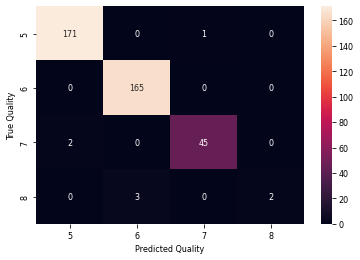

In [199]:
#Confussion Matrix for the Linear Regression Model
label_aux = plt.subplot()
cm_linear_regression = confusion_matrix(y_test,y_prediction_lr)
cm_lr = pd.DataFrame(cm_linear_regression,
                     index = ['5','6','7','8'], 
                     columns = ['5','6','7','8'])
sns.heatmap(cm_lr,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

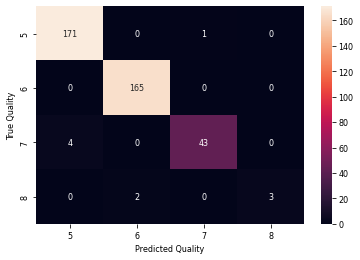

In [200]:
#Confussion Matrix for the Logistic Regression Model
label_aux = plt.subplot()
cm_logistic_regression = confusion_matrix(y_test,y_predlog)
cm_dt = pd.DataFrame(cm_logistic_regression,
                     index = ['5','6','7','8'], 
                     columns = ['5','6','7','8'])
sns.heatmap(cm_dt,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

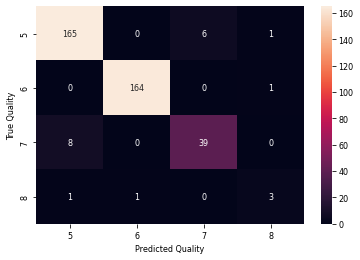

In [162]:
#Confussion Matrix for the Decission Tree Regression Model
label_aux = plt.subplot()
cm_decision_tree_regression = confusion_matrix(y_test,y_prediction_dt)
cm_dt = pd.DataFrame(cm_decision_tree_regression,
                     index = ['5','6','7','8'], 
                     columns = ['5','6','7','8'])
sns.heatmap(cm_dt,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');


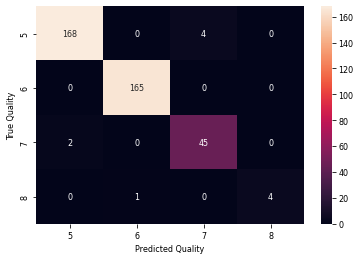

In [163]:
#Confussion Matrix for the Random Forest Regression Model
label_aux = plt.subplot()
cm_random_forest_regression = confusion_matrix(y_test,y_prediction_rf)
cm_rf = pd.DataFrame(cm_random_forest_regression,
                     index = ['5','6','7','8'], 
                     columns = ['5','6','7','8'])
sns.heatmap(cm_rf,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

The Confussion Matrix indicates that we have better results than the ones we obtained before. Therefore we are going to calculaye the new RMSE for the all four models.

In [210]:
RMSE_lr = sqrt(mean_squared_error(y_test, y_prediction_lr))
print("RMSE for new improved Linear Regression is: " + str(RMSE_lr) + "\n")
RMSE_log=sqrt(mean_squared_error(y_test,y_predlog))
print("RMSE for new improved Logistic Regression is: " + str(RMSE_log) + "\n")
RMSE_dt = sqrt(mean_squared_error(y_test, y_prediction_dt))
print("RMSE for new improved Decision Tree Regression is: " + str(RMSE_dt) + "\n")
RMSE_rr = sqrt(mean_squared_error(y_test, y_pred_rr))
print("RMSE for new improved Ridge Regression is: " + str(RMSE_rr) + "\n")
RMSE_lasso = sqrt(mean_squared_error(y_test, y_pred_lasso))
print("RMSE for new improved Lasso Regression is: " + str(RMSE_rr) + "\n")
RMSE_enet = sqrt(mean_squared_error(y_test, y_pred_enet))
print("RMSE for new improved Elastic net Regression is: " + str(RMSE_rr) + "\n")
RMSE_rf = sqrt(mean_squared_error(y_test, y_prediction_rf))
print("RMSE for new improved Random Forest Regression is: " + str(RMSE_rf) + "\n")

RMSE for new improved Linear Regression is: 0.24838811988033238

RMSE for new improved Logistic Regression is: 0.26828983291824676

RMSE for new improved Decision Tree Regression is: 0.45912625188187084

RMSE for new improved Ridge Regression is: 0.5971630075010402

RMSE for new improved Lasso Regression is: 0.5971630075010402

RMSE for new improved Elastic net Regression is: 0.5971630075010402

RMSE for new improved Random Forest Regression is: 0.26828983291824676



F1 Scores
For further testing we are plotting a table that shows the precision, recall and f1score for the 4 regressor models

In [211]:
from prettytable import PrettyTable
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_score

In [215]:
warnings.filterwarnings('ignore')
ptbl = PrettyTable()
ptbl.field_names = ["Regressor Model", "Precision", "Recall", "F1Score"]
ptbl.add_row(["Linear", precision_score(y_test, y_prediction_lr, average = 'weighted'),
           recall_score(y_test, y_prediction_lr, average = 'weighted'), f1_score(y_test, y_prediction_lr, average = 'weighted')])
ptbl.field_names = ["Regressor Model", "Precision", "Recall", "F1Score"]
ptbl.add_row(["Logistic", precision_score(y_test, y_predlog, average = 'weighted'),
           recall_score(y_test, y_predlog, average = 'weighted'), f1_score(y_test, y_predlog, average = 'weighted')])
ptbl.add_row(["Decision Tree", precision_score(y_test, y_prediction_dt, average = 'weighted'), recall_score(y_test, y_prediction_dt, average = 'weighted'), 
           f1_score(y_test, y_prediction_dt, average = 'weighted')])
ptbl.add_row(["Random Forest", precision_score(y_test, y_prediction_rf, average = 'weighted'), recall_score(y_test, y_prediction_rf, average = 'weighted'),
           f1_score(y_test, y_prediction_rf, average = 'weighted')])
print(ptbl)

+-----------------+--------------------+--------------------+--------------------+
| Regressor Model |     Precision      |       Recall       |      F1Score       |
+-----------------+--------------------+--------------------+--------------------+
|      Linear     | 0.9846873855829776 | 0.9845758354755784 | 0.9829276996516331 |
|     Logistic    | 0.9820677164683753 | 0.9820051413881749 | 0.9812216461357864 |
|  Decision Tree  | 0.9533079218745384 | 0.9537275064267352 | 0.9534551898753805 |
|  Random Forest  | 0.9823798457345587 | 0.9820051413881749 | 0.9819817767578752 |
+-----------------+--------------------+--------------------+--------------------+


# **Conclusions**

After having obtained all the results through our models and plots, we can conclude the following: \
* 1- The vast majority of wines are on the interval between quality 5 or 6, while having a good or bad wine seems more unlikely.
* 2- The correlation coefficients between features and quality are not that strong, making really hard to have an accurate prediction using Linear regression algorithms, using a threshold of 0.2
* 3- The following attributes were selected as feature engineering: alcohol, sulphates,citric_acidity are the ones that correlates positively and volatile_acidity is the one correlating megatively.
* 4- 1-off Accuracy seems to gives better results.
* 5-Linear, Logistic regression and Random Forest seem to be the best fiting models for this data set.
